In [33]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd

In [35]:
df = pd.read_csv('../data/diabetes.csv')

In [36]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
y = df['Outcome']
x = df.drop('Outcome', axis=1)

In [38]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [39]:
%pip install scikit-learn

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [42]:
%pip install scikit-learn matplotlib seaborn

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [44]:
model = Sequential()

In [45]:
model.add(Dense(32, activation='relu', input_shape=(8,)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

c:\Users\Kevin\anaconda3\envs\student\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.5491 - loss: 8.7047 - val_accuracy: 0.6504 - val_loss: 3.2059
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6190 - loss: 5.3979 - val_accuracy: 0.6667 - val_loss: 1.7826
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6249 - loss: 5.4444 - val_accuracy: 0.6911 - val_loss: 1.2105
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5159 - loss: 6.8620 - val_accuracy: 0.6585 - val_loss: 1.4548
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5690 - loss: 5.0178 - val_accuracy: 0.6504 - val_loss: 1.0822
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5648 - loss: 3.6113 - val_accuracy: 0.6667 - val_loss: 1.2202
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5703 - loss: 2.8465 - val_accuracy: 0.6585 - val_loss: 1.2903
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5951 - loss: 2.8483 - val_accuracy: 0.7073 - val_loss

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


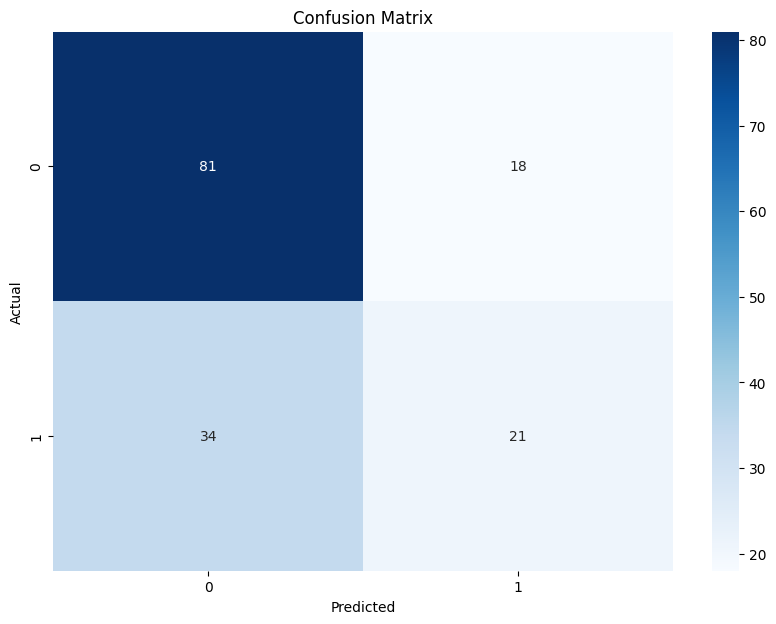

              precision    recall  f1-score   support

           0       0.70      0.82      0.76        99
           1       0.54      0.38      0.45        55

    accuracy                           0.66       154
   macro avg       0.62      0.60      0.60       154
weighted avg       0.65      0.66      0.65       154

ROC-AUC Score: 0.6292011019283746


In [46]:
from sklearn.metrics import classification_report, roc_auc_score

# Make predictions on the test dataset
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_binary))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {roc_auc}')

In [47]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7021 - loss: 0.6131
Test Loss: 0.6565726399421692
Test Accuracy: 0.6623376607894897


In [48]:
# Make predictions on the test dataset
y_pred = model.predict(x_test)
# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [52]:
model.save('diabetes_model.keras')
# Save the model with .h5 extension
model.save('diabetes_prediction_model.h5')

In [ ]:
# Example input features
example_input = {
    "Pregnancies": 5,
    "Glucose": 166,
    "BloodPressure": 72,
    "SkinThickness": 19,
    "Insulin": 175,
    "BMI": 25.8,
    "DiabetesPedigreeFunction": 0.587,
    "Age": 51
}

# Convert the example input to a DataFrame
example_df = pd.DataFrame([example_input])

# Make a prediction
y_pred_example = model.predict(example_df)
y_pred_binary_example = (y_pred_example > 0.5).astype(int)

print(f'Predicted Probability: {y_pred_example[0][0]}')
print(f'Binary Prediction: {y_pred_binary_example[0][0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Probability: 0.6782735586166382
Binary Prediction: 1


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Outcome
0    500
1    268
Name: count, dtype: int64


C:\Users\Kevin\AppData\Local\Temp\ipykernel_8412\1772732235.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_distribution.index, y=target_distribution.values, palette='viridis')


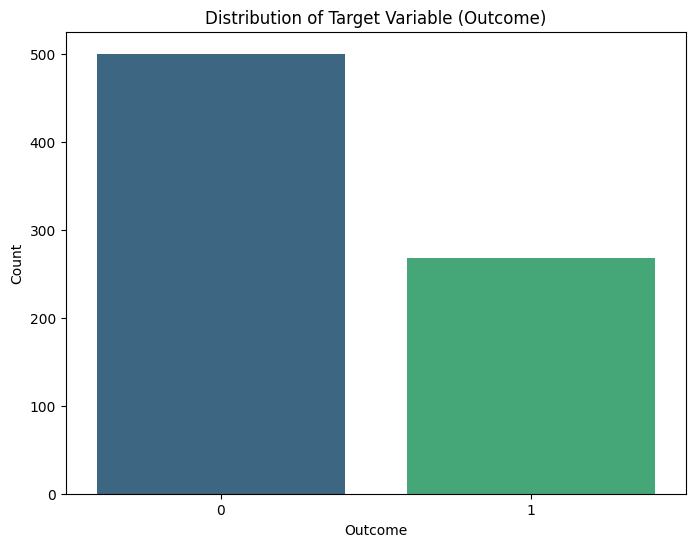

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../data/diabetes.csv')

# Display the first few rows of the dataset
print(df.head())

# Check the distribution of the target variable
target_distribution = df['Outcome'].value_counts()
print(target_distribution)

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.barplot(x=target_distribution.index, y=target_distribution.values, palette='viridis')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Target Variable (Outcome)')
plt.show()

In [ ]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0
